# Jupyter Notebooks for Analysis
We'll be using Python in this Jupyter notebook to do data analysis of resistor circuits. Since this may be your first introduction to this platform, I will describe some of the capabilities. The regions of text or code are called "cells". The cell that this text is located is called a "markdown" cell. If you double click on it, you will see what I actually wrote to make the text look the way it does. To return to the typeset version you see now, type Shift-Enter. The headings start with pound symbols.

# '#' makes a large heading.
## '##' makes a smaller heading.
### '###' makes an even smaller heading.
#### '####' so on and so forth.

If you want to make a list
* You
* start
* each
* line
* with
* an
* asterisk '*'.

Math can be written using a language called LaTeX. Putting LaTeX code between dollar signs will make equations look pretty. $F = ma$ is typed in markdown as '$F = ma$. This is called an inline equation. If instead I want the equation on its own line, I use two dollar signs '$$F = ma $$'.

To make a table, I use straight brackets. It's probably easier to see tables by double-clicking and seeing how it's done.
| F | m | a | 
|--:|--:|--:|
| 5 | 1 | 5 |
| 4 | 2 | 2 |
| 3 | 3 | 1 |

For the most part, you will only use the code cells in these notebooks that I set up for you. So, don't worry too much about the markdown for now. We will be using Jupyter a lot in your future physics classes.

Before we get to the analysis, we need to import libraries to do things we want to do. Python by itself is somewhat limited. Below we import three things. The first two imports are imports of the complete libraries. Using `as` means we need to preface any functions from those libraries with that prefix. For example, if I want to use the number $\pi$, it is available in `numpy`. I can get the value of $\pi$ by typing `np.pi`. The third library only imports one function. Since we don't need the full library, we use a different syntax. We can directly call `curve_fit` after we run this code. You will *always* need to Shift-Enter these imports before you can do anything else we plan to do. Also, if you close this notebook, you have to Shift-Enter every cell that contains something you want to use again. The computer forgets all of the information that is calculated when the notebook is closed.

In [1]:
import numpy as np #making lists of numbers and doing math on them
import matplotlib.pyplot as plt #graphing functionality
from scipy.optimize import curve_fit #we only need curve fitting from this library

Matplotlib is building the font cache; this may take a moment.


# Resistor Circuits
In chapter 2, the first experiment you do is to measure the voltage and current of a single resistor. The data will look something like the following table. Your currents should be different than those listed.
| Voltage (V) | Current (A) | 
|:-----------:|:-----------:|
| 0.5 | 0.017 |
| 1.0 | 0.033 |
| 1.5 | 0.050 |
| 2.0 | 0.067 |
| 2.5 | 0.083 |
| 3.0 | 0.100 |

We expect this to be a straight line with zero y-intercept since the model is $V=IR$. To apply a curve fit to determine if this model is valid, we first define the function of a line. This is in the lines beginning with `def`. You may have noticed that comments in code start with '#'.

Next, we define lists or arrays of numbers for our data and its uncertainty. The voltages should be fine as they are. The uncertainties and currents come from your experimentation. You will need to list the values of current with commas between each value. You can see where I entered the current values from the table above into the code below. The uncertainties should be a constant that you enter in place of 0.05 and 0.001. These numbers represent 0.05 V and 0.001 A of uncertainty in my example. 

The rest of the code should *just work* when you Shift-Enter. It will 
* fit the linear function to your data,
* print the results of the fit,
* and plot your data with error bars.


slope = 30.066125040331958 +/- 0.7187514772424982
intercept = -0.003857297212532548 +/- 0.04663207320548138


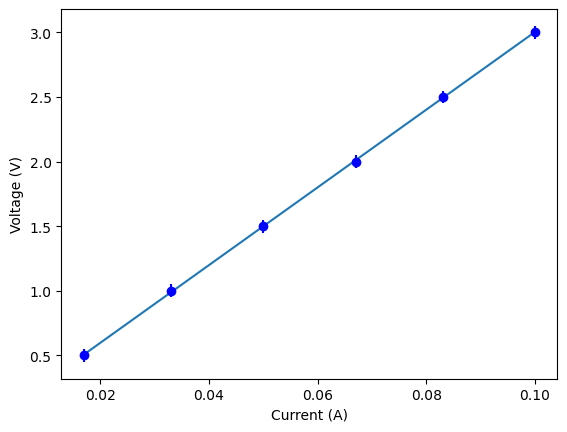

In [2]:
#define a linear function
def line_fit (x, m, b):
	return m*x + b

#Define your data
V = np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0])
V_unc = np.ones(6)*0.05 #adjust this to the appropriate uncertainty
I = np.array([0.017,0.033,0.050,0.067,0.083,0.100]) #enter your current values
I_unc = np.ones(6)*0.1 #adjust this to the appropriate uncertainty

#Do the linear fit
parms, cov = curve_fit(line_fit, I, V, sigma=V_unc, absolute_sigma=True)
print("slope =", parms[0], "+/-", np.sqrt(cov[0][0]))
print("intercept =", parms[1], "+/-", np.sqrt(cov[1][1]))

plt.errorbar(I, V, yerr=V_unc, fmt='ob') #plot the data
plt.plot(I, parms[0]*I+parms[1])
plt.xlabel('Current (A)')
plt.ylabel('Voltage (V)')
plt.show()

## Other circuits to analyze
You can copy the code above (leaving out the line function). Paste it into a new code cell and repeat the analysis for each resistor in the series and parallel resistor circuits. You can also just edit the code above, but if you need to fix something later, it will be more work than copying and pasting. Use the markdown cells below to label what you're analyzing so you have a record of it.

### Series resistor 1 value = 

### Series resistor 2 value = 

### Parallel resistor 1 value = 

### Parallel resistor 2 value = 